In [12]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [13]:
class AgentState(TypedDict):
    name : str
    age : int
    skills : List
    res : str

In [18]:
def first_node(state: AgentState) -> AgentState:
    """This is the first node in the sequence"""
    state["res"] = f"{state["name"]}, welcome to the system!"
    return state

def second_node(state: AgentState) -> AgentState:
    """This is the second node in the sequence"""
    state["res"] += f" You are {state["age"]} years old!"
    return state

def third_node(state: AgentState) -> AgentState:
    """This is the third node in the sequence"""
    state["res"] += f"You have the following skills : "
    
    for i in range(len(state["skills"])):
        if i == len(state["skills"]) - 1:
            state["res"] += f"and {state["skills"][i]}"
        else:
            state["res"] += f"{state["skills"][i]},"
    
    return state

In [19]:
graph = StateGraph(AgentState)

graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)
graph.add_node("third_node", third_node)

graph.add_edge("first_node", "second_node")
graph.add_edge("second_node", "third_node")
graph.set_entry_point("first_node")
graph.set_finish_point("third_node")

app = graph.compile()

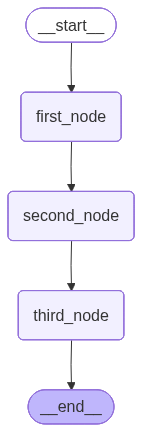

In [20]:
app

In [21]:
app.invoke({"name" : "sudeep", "age" : 24, "skills" : ["python", "ml", "ai"]})

{'name': 'sudeep',
 'age': 24,
 'skills': ['python', 'ml', 'ai'],
 'res': 'sudeep, welcome to the system! You are 24 years old!You have the following skills : python,ml,and ai'}